# Wholesale Gasoline Price Prediciton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("LOTOS.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

Date   Price  Excise  Surcharge
0 2004-01-01  2530.0  1514.0      79.28
1 2004-01-08  2580.0  1514.0      79.28
2 2004-01-13  2615.0  1514.0      79.28
3 2004-01-16  2615.0  1514.0      79.28
4 2004-01-21  2650.0  1514.0      79.28

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4527 entries, 0 to 4526
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4527 non-null   datetime64[ns]
 1   Price      4527 non-null   float64       
 2   Excise     4527 non-null   float64       
 3   Surcharge  4527 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 141.6 KB


In [4]:
df.describe()

Price       Excise    Surcharge
count  4527.000000  4527.000000  4527.000000
mean   3733.120168  1528.269052   111.710241
std     702.738072    65.360465    26.923067
min    2428.000000  1315.000000    79.280000
25%    3304.000000  1540.000000    87.400000
50%    3588.000000  1540.000000   103.160000
75%    4123.000000  1565.000000   131.400000
max    7521.000000  1565.000000   165.140000

In [5]:
working = df.loc[3000:]
working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 3000 to 4526
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1527 non-null   datetime64[ns]
 1   Price      1527 non-null   float64       
 2   Excise     1527 non-null   float64       
 3   Surcharge  1527 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 47.8 KB


In [6]:
import matplotlib.dates as mdate

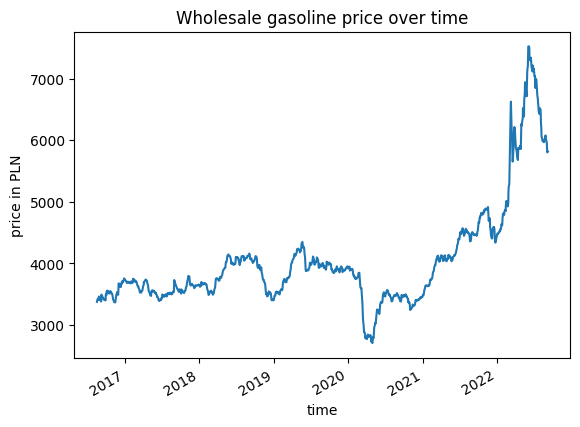

In [7]:
plt.plot(working["Date"], working["Price"])
plt.rcParams['figure.figsize'] = [20, 12]
plt.title("Wholesale gasoline price over time")


locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.show()

In [8]:
from pandas.plotting import lag_plot

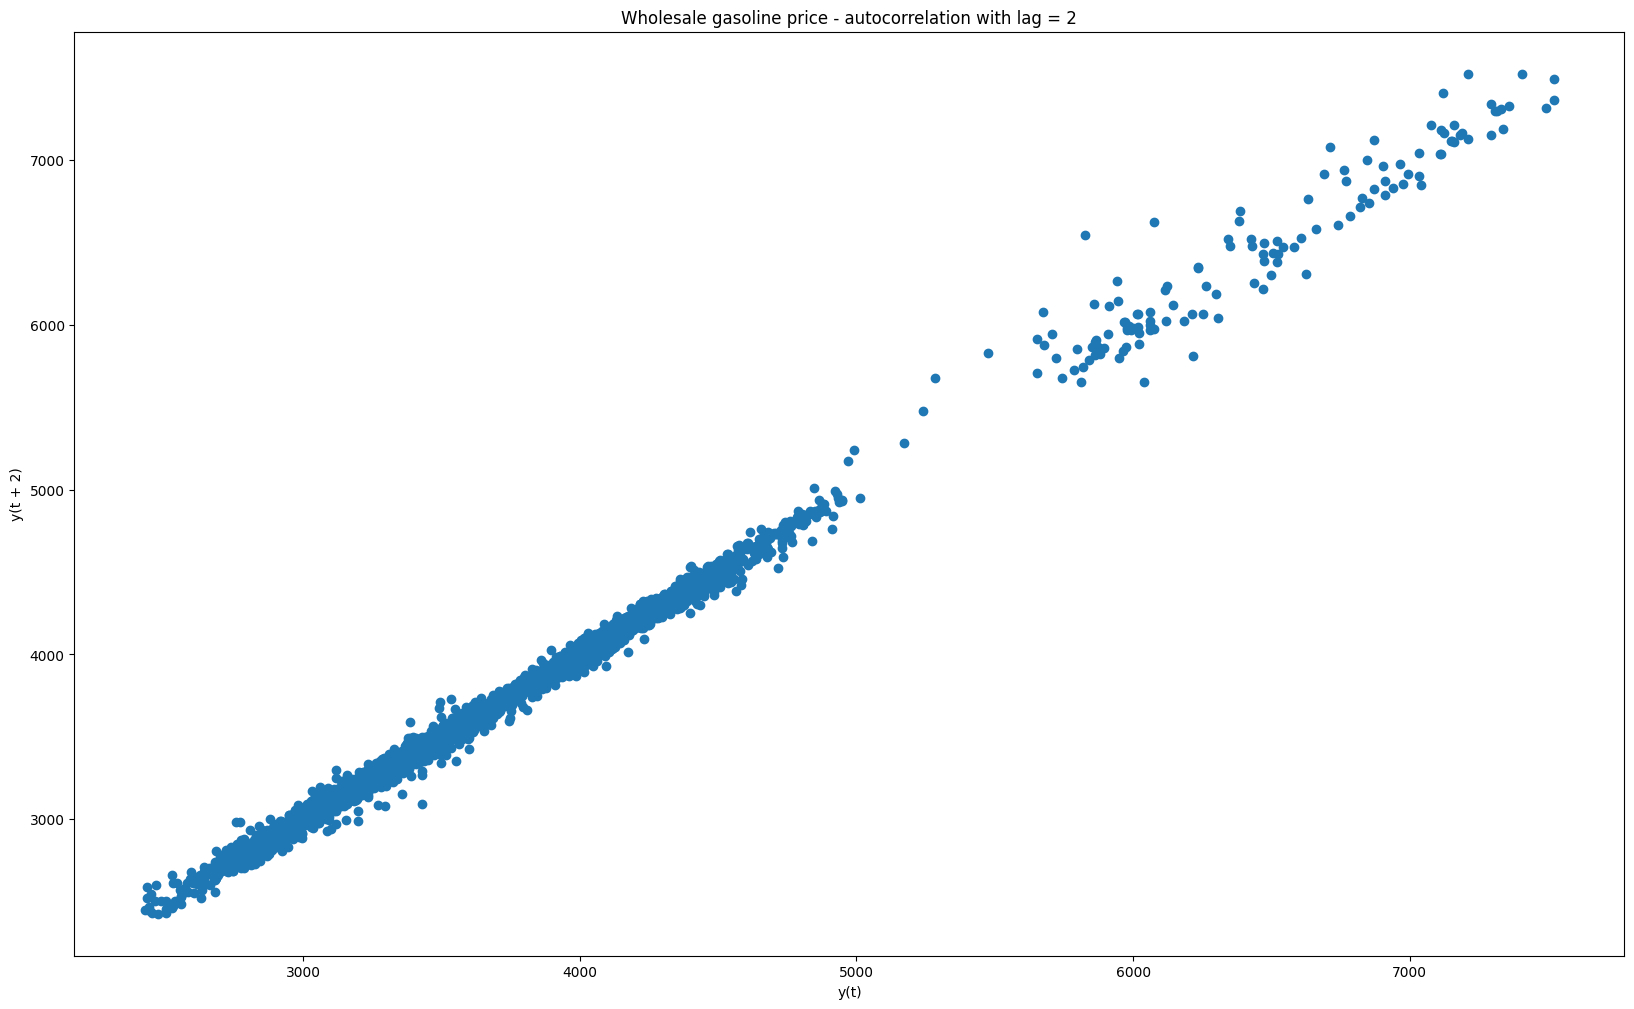

In [9]:
lag = 2

plt.figure()
lag_plot(df["Price"], lag = lag)
plt.title(f"Wholesale gasoline price - autocorrelation with lag = {lag}")
plt.show()

In [10]:
split = 0.65

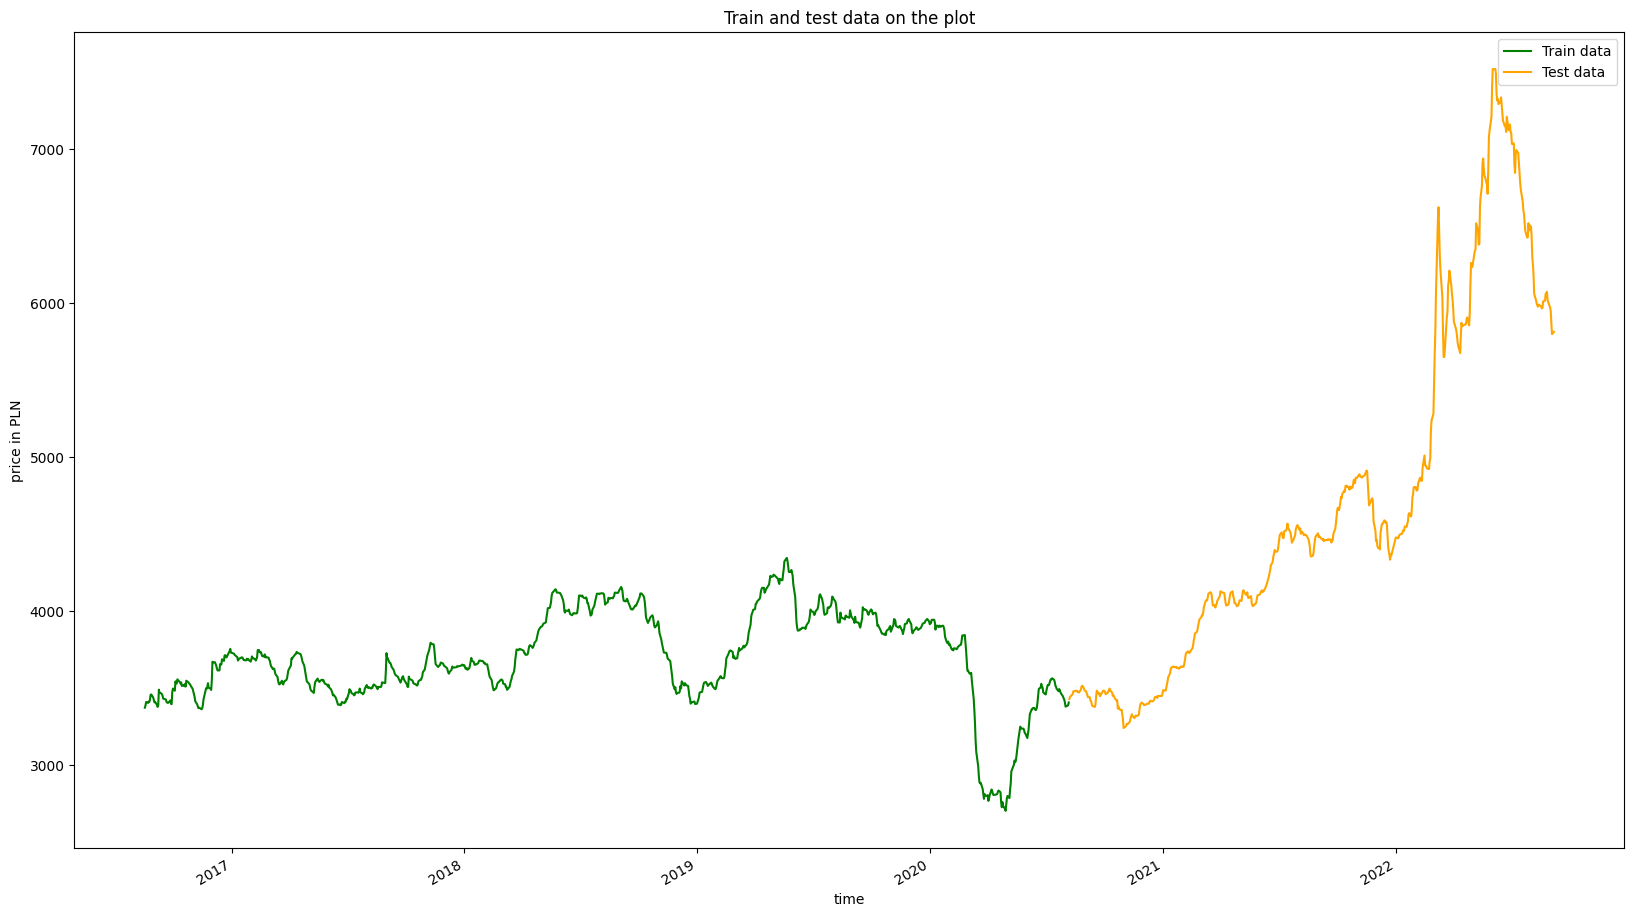

In [11]:
train, test = working[0: int(len(working)*split)], working[int(len(working)*split):]

plt.plot(train["Date"], train["Price"], color = "green", label = "Train data")
plt.plot(test["Date"], test["Price"], color = "orange", label = "Test data")
plt.rcParams['figure.figsize'] = [20, 12]

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.title("Train and test data on the plot")
plt.legend()
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [13]:
train, test = working[0: int(len(working)*split)], working[int(len(working)*split):]
train = train["Price"].values
test = test["Price"].values

In [14]:
history = [x for x in train]
predictions = []
test_set_size = len(test)

# ARIMA parameters

p=4
d=1
q=0

for time_point in range (test_set_size):
    model = ARIMA(history, order= (p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    true_value = test[time_point]
    history.append(true_value)


In [15]:
MSE = sum((test - predictions)**2)/test_set_size
RMSE = MSE**0.5
print(f'MSE = {MSE} \nRMSE = {RMSE}')

MSE = 2252.2950806332838 
RMSE = 47.458351010473216


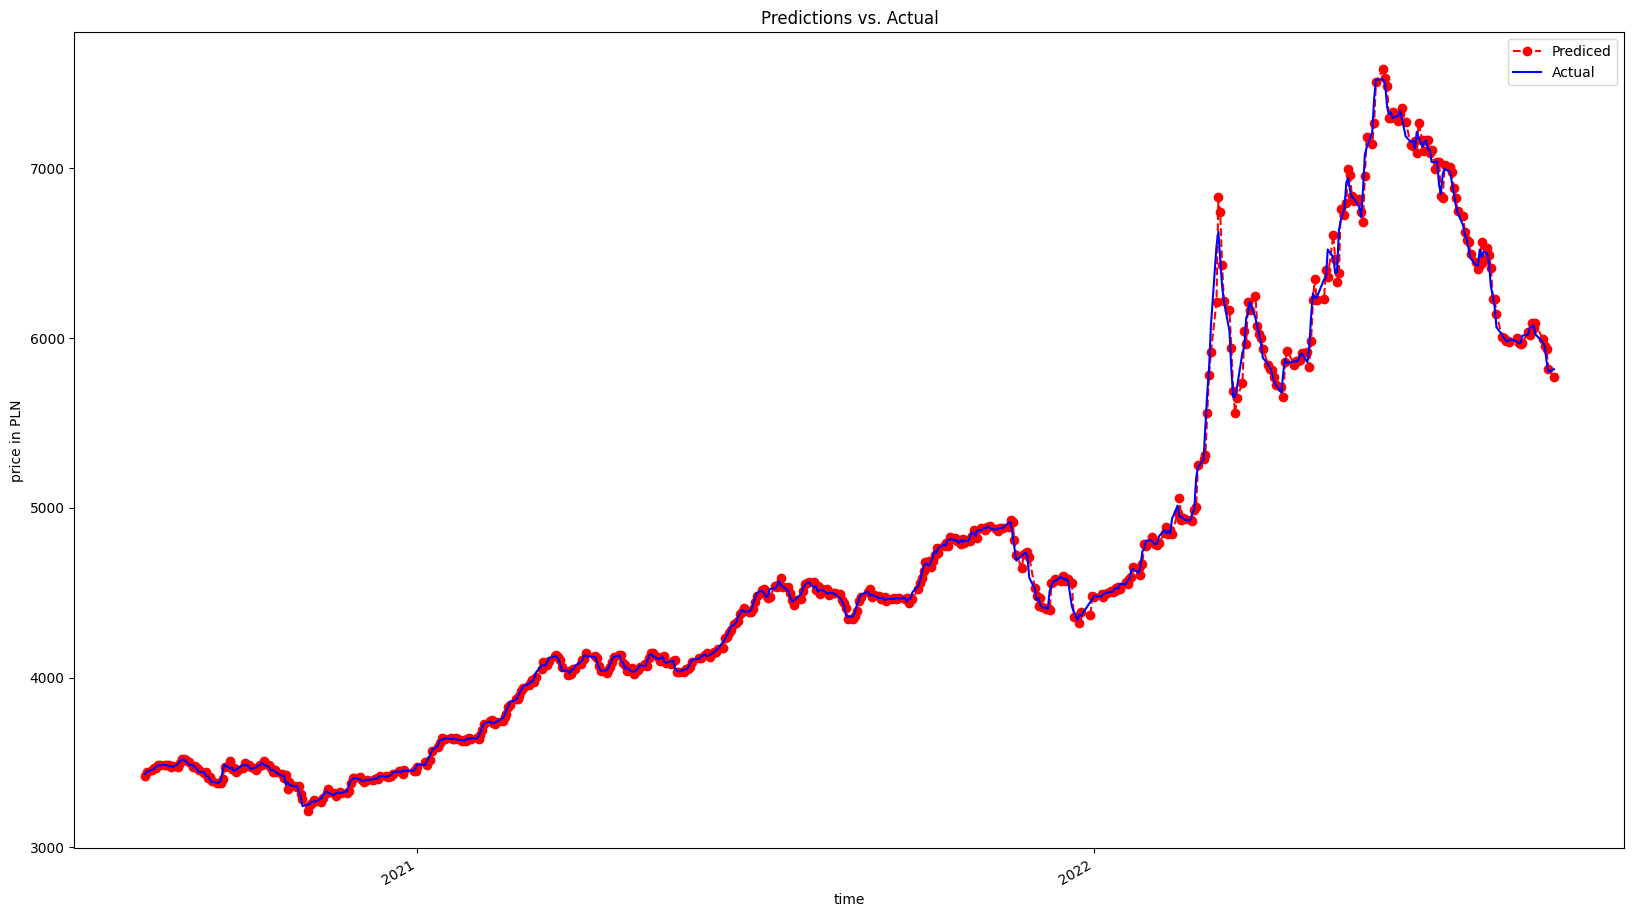

In [16]:
test = working[int(len(working)*split):]

plt.plot(test["Date"], predictions, color = "red", marker = "o", 
linestyle = "dashed", label = "Prediced")

plt.plot(test["Date"], test["Price"], color = "blue", label = "Actual")

plt.rcParams['figure.figsize'] = [20, 12]

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.title("Predictions vs. Actual")
plt.legend()
plt.show()

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

2022-09-07 07:37:28.839435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-07 07:37:29.237068: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-07 07:37:30.517878: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-09-07 07:37:30.518227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_

# LSTM

In [21]:
train, test = working[0: int(len(working)*split)], working[int(len(working)*split):]
train = train["Price"].values
test = test["Price"].values

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
train = np.reshape(train, (-1,1))
train_scaled = scaler.fit_transform(train)

In [24]:
train_set_size = len(train)
time_steps = 60

X_train = []
y_train = []

for i in range (time_steps, train_set_size):
    X_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # #values, #time-steps, #output
X_train.shape

(932, 60, 1)

Building the Keras model:

In [27]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, epochs= 100, batch_size=32)

2022-09-07 08:00:19.835014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 08:00:19.932615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 08:00:19.933337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 08:00:19.934364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/100


2022-09-07 08:00:31.226457: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


30/30 [==============================] - 10s 23ms/step - loss: 0.0599
Epoch 2/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0153
Epoch 3/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0110
Epoch 4/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0126
Epoch 5/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0104
Epoch 6/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0111
Epoch 7/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0112
Epoch 8/100
30/30 [==============================] - 1s 26ms/step - loss: 0.0090
Epoch 9/100
30/30 [==============================] - 1s 25ms/step - loss: 0.0085
Epoch 10/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0080
Epoch 11/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0076
Epoch 12/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0083
Epoch 13/100
30/30 [================